# Project: Investigate Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

> I have choose tmdb movie data. from this data set I have several question about the data. 
> 1. Top 10 revenue movie!
> 2. Which movie has the highest rating in each year?
> 3. Who is the most productive directors?

In [94]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import percentile
import seaborn as sns


%matplotlib inline

In [95]:
#defining function to determine outliers data
def lower_outlier(data):
    return data.quantile(0.25) - ((data.quantile(0.75)) - (data.quantile(0.25)) * 1.5)
def upper_outlier(data):
    return data.quantile(0.75) + ((data.quantile(0.75)) - (data.quantile(0.25)) * 1.5)

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [96]:
#loading data that will be used to analyze.
df=pd.read_csv('tmdb-movies.csv')
#print out a few lines
df.head(3)
df.budget_adj.mean()

17551039.822886847

In [97]:
#removing budget,revenue,tagline,overview, homepage and release_date columns from data. those columns will note be use for analyze
df=df.drop(['id','budget','revenue','tagline','overview','release_date','homepage'],axis=1)
#drop null value from data
df.dropna(inplace=True)

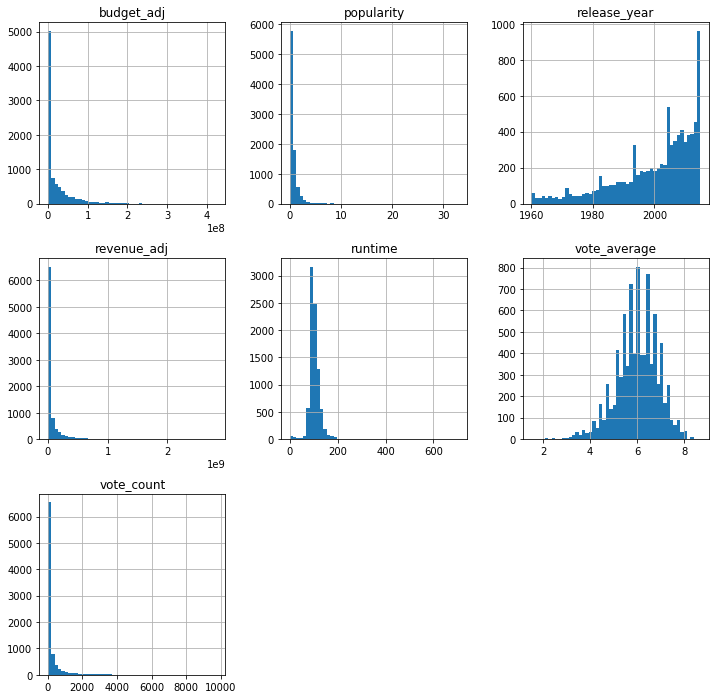

In [98]:
df.hist(bins=50,figsize=(12,12)); #checking data distribution

### Histogram charts above show us the distribution of the data we have

In [99]:
#removing movie that has 0 budget
df=df[df.budget_adj != 0]

Text(0.5,1,'Budget Box Plot')

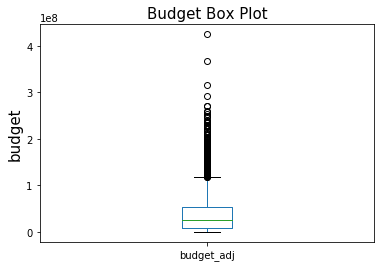

In [100]:
#displaying box chart of budget_adj. looking for outliers data
df.budget_adj.plot(kind='box');plt.ylabel('budget',size=15);plt.title('Budget Box Plot',size=15)

### Box chart above can tell us about outliers data, the outliers must be eliminate to continue the analysis


In [101]:
#removing outliers data, im using interquartile range to eliminate outliers data
#determine lower and upper cutoff
budget_uppercutoff=upper_outlier(df.budget_adj)
budget_lowercutoff=lower_outlier(df.budget_adj)
q25_budget=df_1.budget_adj.quantile(0.25)
budget_lowercutoff,budget_uppercutoff

(-29371960.57825022, 92026199.02276678)

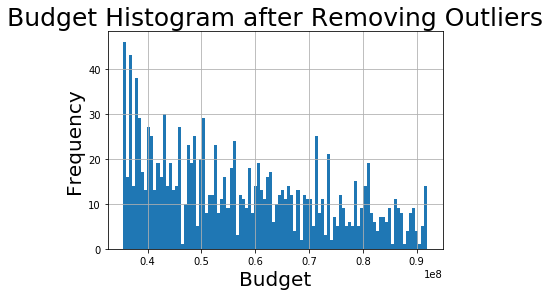

In [102]:
#removing outliers data, 
#because lower cutoff has negative value, so im just going to use 1st quartile as lower cutoff
df_1=df.query('@q25_budget < budget_adj < @budget_uppercutoff')
#box chart after removing budget outliers data
df_1.budget_adj.hist(bins=100);plt.xlabel('Budget',size=20);plt.ylabel('Frequency',size=20),plt.title('Budget Histogram after Removing Outliers',size=25);

### From chart above we can see that data has right skewed distribution. and the range of movie budget range is between 25.240.045,98 to 91.999.959,52. The data already adjusted to 2010 condition. inflation already included in calculation

In [103]:
#removing movie with 0 revenue
df_1=df_1[df_1.revenue_adj != 0]

In [104]:
#removing outliers data, im using interquartile range to eliminate outliers data
#determine lower and upper cutoff
revenue_lowercutoff=lower_outlier(df_1.revenue_adj)
revenue_uppercutoff=upper_outlier(df_1.revenue_adj)
q25_revenue=df_1.revenue_adj.quantile(0.25)
revenue_lowercutoff,revenue_uppercutoff

(-70270597.90281339, 324508712.24680746)

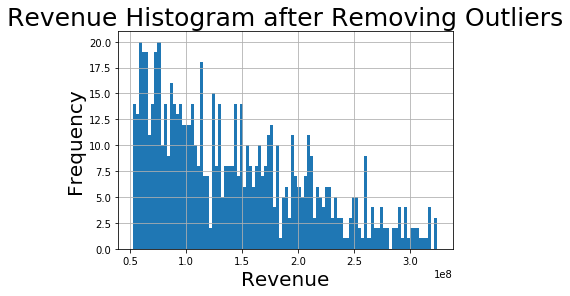

In [105]:
#removing outliers data, 
#because lower cutoff has negative value, so im just going to use 1st quartile as lower cutoff
df_1=df_1.query('@q25_revenue < revenue_adj < @revenue_uppercutoff')
#box chart after removing revenue outliers data
df_1.revenue_adj.hist(bins=100);plt.xlabel('Revenue',size=20);plt.ylabel('Frequency',size=20),plt.title('Revenue Histogram after Removing Outliers',size=25);

### From chart above we can see that data has right skewed distribution. and the range of movie revenue range is between 41.498.145,78 to 291.879.225,08. The data already adjusted to 2010 condition. inflation already included in calculation

In [106]:
#removing outliers data, 
#because lower cutoff has negative value, so im just going to use 1st quartile as lower cutoff
lower_outlier(df_1.runtime),upper_outlier(df_1.runtime)

(123.5, 99.5)

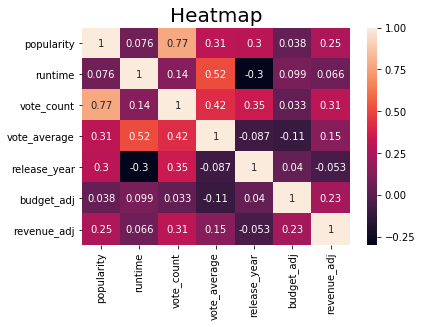

In [107]:
#heatmap of the data. it shows correlation between the columns
sns.heatmap(df_1.corr(), annot=True),plt.title('Heatmap',size=20);

### Figure above show the correlation between the data column. the darker the color show low correlation and the lighter the color show highest correlation between the data.

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (Top 10 Movie Revenue!)

In [108]:
#top 10 revenue movie
df_top10revenue=df_1.nlargest(10,'revenue_adj')
df_top10revenue.original_title.head(10)

1387         Inglourious Basterds
1408                 The Proposal
8484          The English Patient
10112             West Side Story
6202             Wedding Crashers
4190     Clear and Present Danger
9463                     Cocktail
4209                   Disclosure
10228                Philadelphia
6085             A View to a Kill
Name: original_title, dtype: object

Text(0.5,1,'Top 10 Movie Revenue')

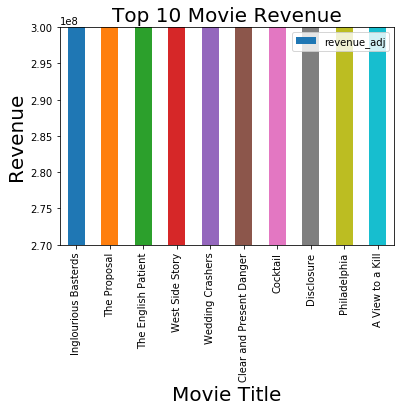

In [109]:
df_top10revenue.plot(x='original_title',y='revenue_adj',kind='bar')
plt.ylim(2.7e8,3.0e8);
plt.xlabel('Movie Title',size=20)
plt.ylabel('Revenue',size=20)
plt.title('Top 10 Movie Revenue',size=20)

### Chart above shows the 10 movie with highest revenue. The revenue range between 282.936.387,22 to 291.879.225,083

In [110]:
df_1.revenue_adj.max()

324364937.762752

In [111]:
df_top10revenue.revenue_adj.min(),df_top10revenue.revenue_adj.max()

(308996785.928224, 324364937.762752)

(7, 8.5)

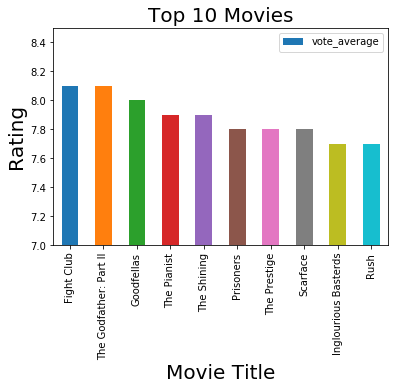

In [112]:
#top 10 movie based on rating
df_top10rating=df_1.nlargest(10,'vote_average')
df_top10rating.plot(x='original_title',y='vote_average',kind='bar')
plt.title('Top 10 Movies',size=20)
plt.xlabel('Movie Title',size=20)
plt.ylabel('Rating',size=20)
plt.ylim(7,8.5)

### Chart above shows the 10 movie with highest rating. The rating range between 7,8 to 8,4

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 2 (Which movie has the highest rating in each year?!)

In [113]:
#grouping data with release_year and original title classification
df_9=df_1.groupby(['release_year','original_title']).agg({'vote_average':sum})
#determine movie highest rating in each year
df_9 = df_9['vote_average'].groupby(level=0, group_keys=False).nlargest(1)
#converting the series into dataframe format
df_9 = pd.DataFrame(data=df_9)
#reset index
df_9.reset_index(level=['release_year','original_title'], inplace=True)
#print the result
df_9.mean()

release_year    1990.20
vote_average       7.27
dtype: float64

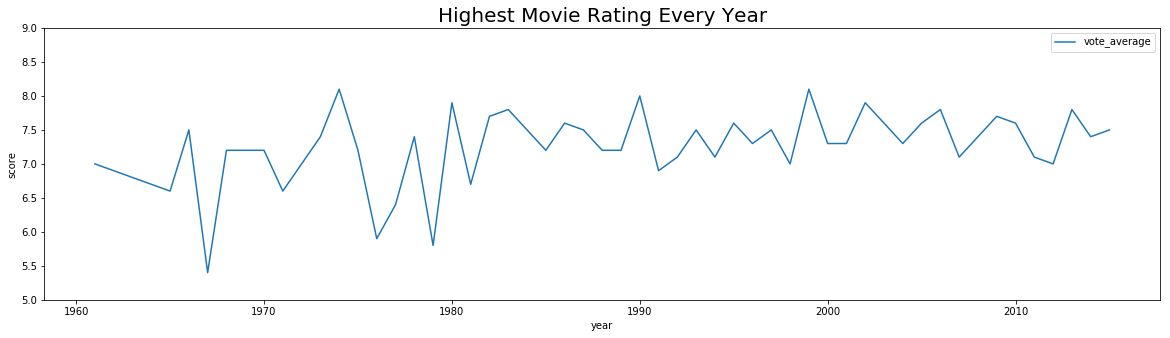

In [114]:
df_9.plot(x='release_year',y='vote_average',kind='line',figsize=(20,5));plt.title('Highest Movie Rating Every Year',size=20);
plt.xlabel('year'),plt.ylabel('score'),plt.ylim(5,9);

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 3 (Who is the most productive directors?)

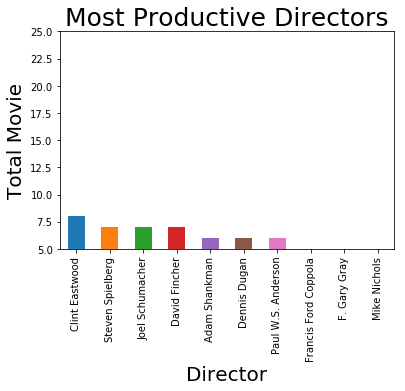

In [115]:
# Top 10 most productive director
df_topdirector=df_1.director.value_counts().nlargest(10)
df_topdirector.plot(kind='bar')
plt.title('Most Productive Directors',size=25),plt.xlabel('Director',size=20),plt.ylabel('Total Movie',size=20),plt.ylim(5,25);


In [116]:
df_topdirector.head(10)

Clint Eastwood          8
Steven Spielberg        7
Joel Schumacher         7
David Fincher           7
Adam Shankman           6
Dennis Dugan            6
Paul W.S. Anderson      6
Francis Ford Coppola    5
F. Gary Gray            5
Mike Nichols            5
Name: director, dtype: int64

<a id='conclusions'></a>
## Conclusions

### Top 10 movies based on their revenue are 
> 1.                Jerry Maguire
> 2.         Alvin and the Chipmunks
> 3.                 Ghostbusters II
> 4.                  A Few Good Men
> 5.                         Jumanji
> 6.     Four Weddings and a Funeral
> 7.                  The Green Mile
> 8.                         Chicago
> 9.              The Little Mermaid
> 10.      Kingsman: The Secret Service

### Highest rating movie in each year
0.	1960	The Apartment	7.9
1.	1961	One, Two, Three	7.5
2.	1962	To Kill a Mockingbird	7.7
3.	1963	Charade	7.5
4.	1964	Dr. Strangelove or: How I Learned to Stop Worr...	7.7
5.	1965	Those Magnificent Men in Their Flying Machines...	6.6
6.	1966	Who's Afraid of Virginia Woolf?	7.5
7.	1967	Bonnie and Clyde	7.6
8.	1968	2001: A Space Odyssey	7.7
9.	1969	Midnight Cowboy	7.0
10.	1970	The Ballad of Cable Hogue	7.3
11.	1971	A Clockwork Orange	7.7
12.	1972	The Getaway	7.2
13.	1973	Papillon	7.4
14.	1974	The Godfather: Part II	8.1
15.	1975	Barry Lyndon	7.2
16.	1976	Network	7.4
17.	1977	Annie Hall	7.6
18.	1978	The Deer Hunter	7.4
19.	1979	Apocalypse Now	7.8
20.	1980	The Shining	7.9
21.	1981	Blow Out	7.4
22.	1982	Blade Runner	7.7
23.	1983	Scarface	7.8
24.	1984	Amadeus	7.5
25.	1985	The Color Purple	7.5
26.	1986	Aliens	7.6
27.	1987	Full Metal Jacket	7.7
28.	1988	Die Hard	7.2
29.	1989	Do the Right Thing	7.5
30.	1990	Goodfellas	8.0
31.	1991	Boyz n the Hood	7.3
32.	1992	Unforgiven	7.5
33.	1993	Philadelphia	7.5
34.	1994	The Shawshank Redemption	8.4
35.	1995	The Usual Suspects	8.0
36.	1996	Fargo	7.6
37.	1997	Good Will Hunting	7.7
38.	1998	American History X	8.0
39.	1999	Fight Club	8.1
40.	2000	Memento	7.9
41.	2001	Baby Boy	7.4
42.	2002	The Pianist	7.9
43.	2003	Kill Bill: Vol. 1	7.6
44.	2004	Eternal Sunshine of the Spotless Mind	7.8
45.	2005	Pride & Prejudice	7.6
46.	2006	The Prestige	7.8
47.	2007	There Will Be Blood	7.8
48.	2008	Gran Torino	7.6
49.	2009	3 Idiots	7.8
50.	2010	Shutter Island	7.6
51.	2011	The Help	7.6
52.	2012	Moonrise Kingdom	7.6
53.	2013	12 Years a Slave	7.9
54.	2014	The Imitation Game	8.0
55.	2015	Spotlight	7.8

### Who is the most productive directors?
1. Clint Eastwood      22
2. Woody Allen         14
3. Wes Craven          12
4. Oliver Stone        12
5. Brian De Palma      12
6. Steven Spielberg    11
7. Ridley Scott        11
8. Joel Schumacher     10
9. Robert Rodriguez    10
10. Tony Scott          10

### From the heatmap that showing correlation between data. we can see if  vote_count and popularity has correlation 0.79. More popular the movie the higher number of people give them vote.

### The average rating for the best movie every year is 7.63

###  The lowest revenue of top 10 revenue movie is 371,497,801.66 (Kingsman : The Secret Service) and the highest is 380,297,392.38 (Jerry Mcguire)

### The dataset only cover the data until 2015. there are no data from 2016-2018. 

### The null and duplicate data have significant effect in exploratory section. if we do not eliminate 0 value in budget, revenue, and runtime. it can make mean value smaller than it should.

### Genres didnt include in analysis.